In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(font_scale=1.5, style='ticks')
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline

hits_label = ['jGCaMP8f', 'jGCaMP8m', 'jGCaMP8s', 'jGCaMP7f', 'XCaMP-Gf', 'GCaMP6s', 'GCaMP6f', 'TG-GCaMP6s', 'TG-GCaMP6f']
hits_colors = ['#0000ff',  '#ff0000', '#666666', '#00ff00',  '#0099ff',  '#FFD670',  '#FFD670',  '#FFD670',   '#FFD670']

sensor6_df = pd.read_csv('GCaMP8_exported_ROIs_s2f_full/GCaMP6s_ev.csv')
sensor8_df = pd.read_csv('GCaMP8_exported_ROIs_s2f_full/GCaMP8s_ev.csv')
sensor_df = pd.concat([sensor8_df, sensor6_df])
sensor8_df_sub = sensor8_df[sensor8_df['Cell'].str.contains('jGCaMP8')]

## Figure B: Explained variance -- linear vs sigmoid model

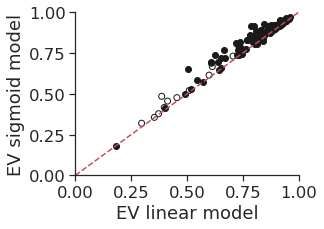

In [2]:
plt.figure(figsize=(4, 3))
idx = sensor8_df_sub['Type']
plt.scatter(sensor8_df_sub['EV_l'][idx], sensor8_df_sub['EV_s'][idx], c='k')
plt.scatter(sensor8_df_sub['EV_l'][~idx], sensor8_df_sub['EV_s'][~idx], edgecolors='k', facecolors='none')
plt.plot([0, 1], [0, 1], '--r')
sns.despine()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('EV linear model')
plt.ylabel('EV sigmoid model')
sns.despine()
plt.savefig('figures/EV_linear_sigmoid.pdf')
plt.show()

## Figure C: Variance explained (sigmoid - linear)

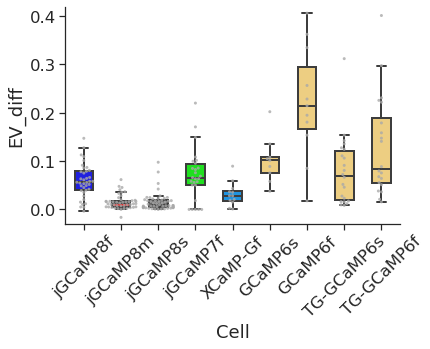

In [3]:
sns.swarmplot(data=sensor_df, 
              x='Cell', 
              y='EV_diff', 
              order = hits_label, 
              size=3,
              alpha=0.8,
              color='darkgray',
              edgecolor = None,
              linewidth=0)
ax = sns.boxplot(data=sensor_df, 
                 x='Cell', 
                 y='EV_diff',
                 order = hits_label, 
                 showfliers=False, 
                 linewidth=2,
                 width=.5,
                 palette = hits_colors)

sns.despine()
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.ylim([-0.03, 0.42])
plt.show()